<a href="https://colab.research.google.com/github/Drovie/ML_LABS/blob/main/%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [7]:
#!pip install datasets seaborn
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('/content/sample_data/agricultural_yield_test.csv')
df.rename(columns = {' Soil_Quality ':' soil_ql', 'Seed_Variety ':' seed_v ','Fertilizer_Amount_kg_per_hectare ':' fert_amount ','Irrigation_Schedule ':' irr_le ','Yield_kg_per_hectare ':' yeild_amount '}, inplace = True )
df

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [17]:
#dataset = load_dataset('lvwerra/red-wine')
#data = dataset['train']

#df = pd.DataFrame(data)
#df

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

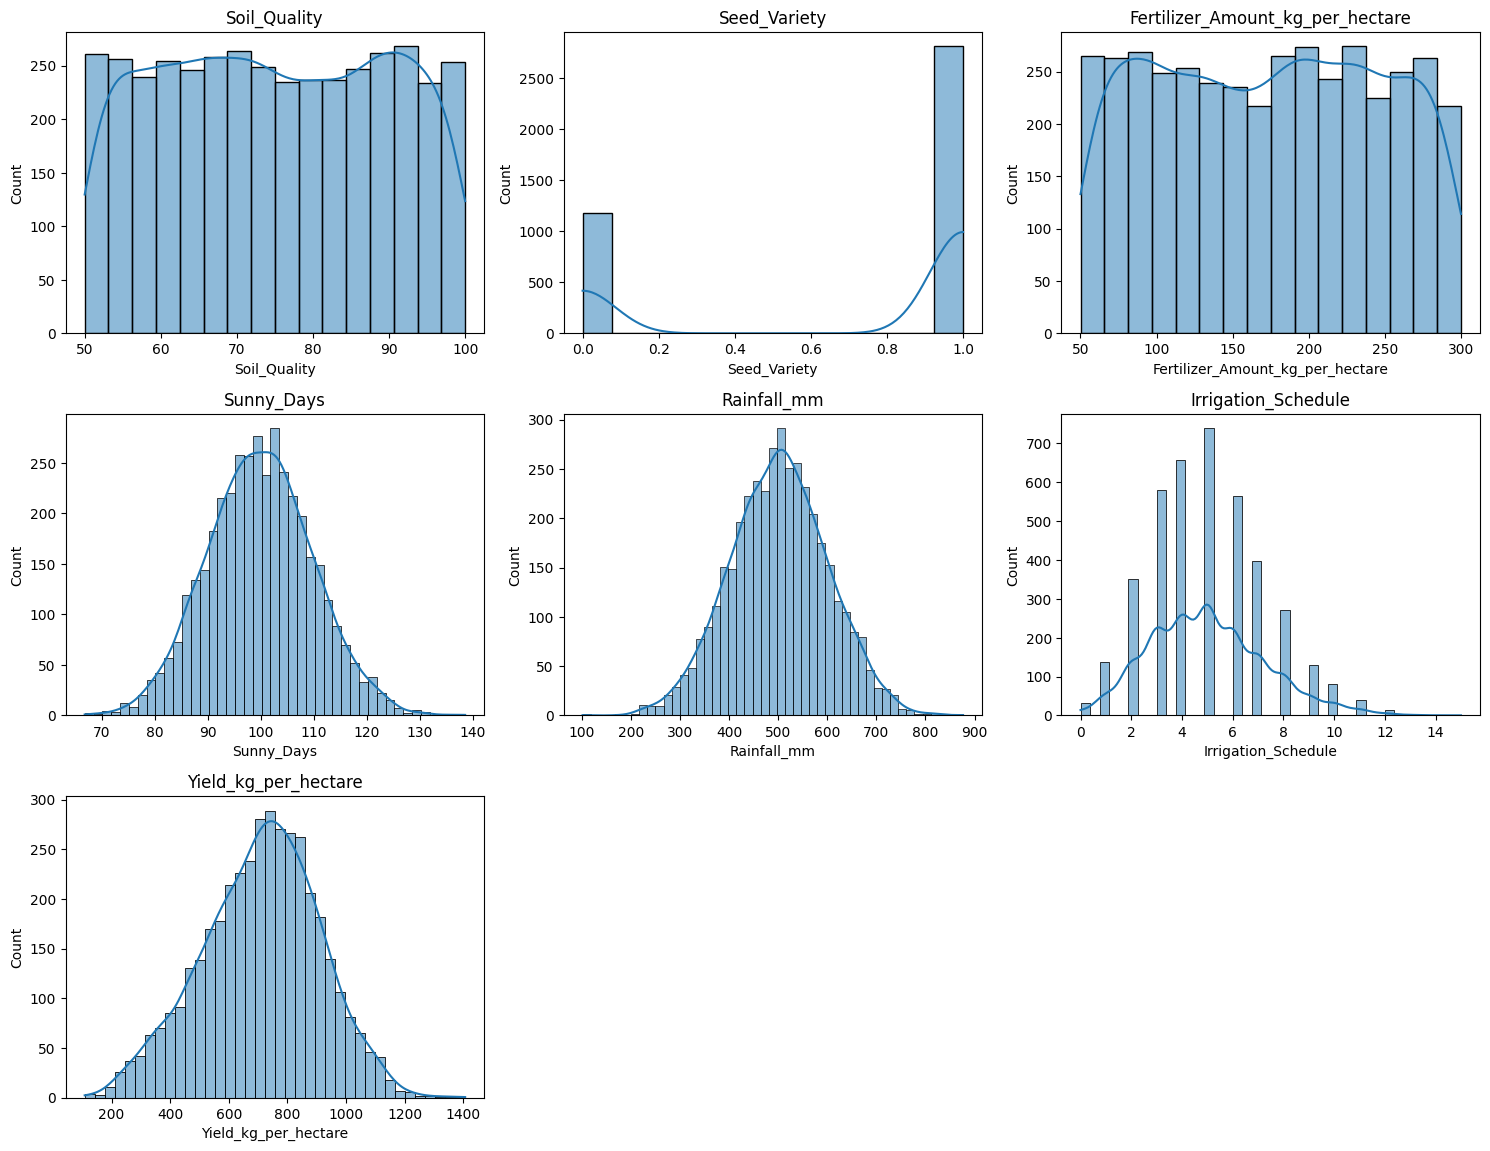

In [37]:
"""
Код здесь
"""
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

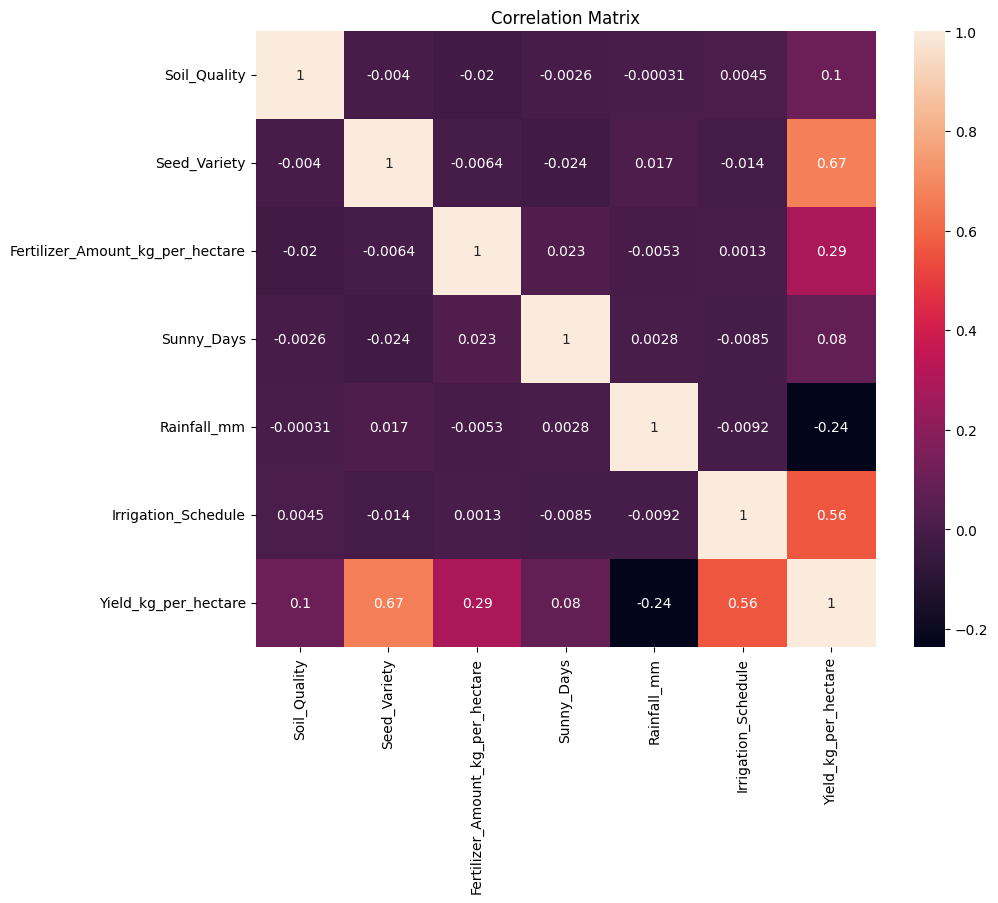

In [39]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [58]:
df.corr()['Yield_kg_per_hectare']

<ipython-input-58-1f44410f3462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Yield_kg_per_hectare']


Soil_Quality                        0.101171
Fertilizer_Amount_kg_per_hectare    0.287910
Sunny_Days                          0.079543
Rainfall_mm                        -0.237573
Yield_kg_per_hectare                1.000000
Name: Yield_kg_per_hectare, dtype: float64

Признаки, определяющие количество урожая - вариант высаживаемым семян и расписание полива угодий

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [54]:
"""
Код здесь
"""

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['Seed_Variety'] = df['Seed_Variety'].astype("category")
df['Irrigation_Schedule'] = df['Irrigation_Schedule'].astype("category")

cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
cat_features

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[cat_features])
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns


df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Soil_Quality,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Yield_kg_per_hectare,Seed_Variety_0,Seed_Variety_1,Irrigation_Schedule_0,Irrigation_Schedule_1,Irrigation_Schedule_2,...,Irrigation_Schedule_6,Irrigation_Schedule_7,Irrigation_Schedule_8,Irrigation_Schedule_9,Irrigation_Schedule_10,Irrigation_Schedule_11,Irrigation_Schedule_12,Irrigation_Schedule_13,Irrigation_Schedule_14,Irrigation_Schedule_15
0,93.304721,132.522218,96.670922,602.386237,278.986563,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83.674653,57.283997,99.007556,466.518251,836.434840,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65.963033,227.895479,104.844272,510.320495,785.881787,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78.692834,176.314126,90.136191,354.350914,807.884526,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72.415684,160.070418,101.221668,443.993788,1064.542374,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.094714,124.108262,98.970659,496.705800,802.209345,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,53.256984,100.310322,111.448947,667.056391,509.646540,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,94.145522,196.473704,110.003474,458.241408,776.013634,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,61.452120,80.618357,97.815517,778.652540,502.319484,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [57]:
"""
Код здесь
"""

X = df_copy
y = df_copy['Yield_kg_per_hectare'] # целевая переменная
X = X.drop(['Soil_Quality', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm' ], axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 3200 строк на оубчение и 800 строк на валидацию

(3994    755.267523
 423     889.252461
 2991    851.979206
 1221    387.906486
 506     746.472276
            ...    
 1130    822.850408
 1294    898.240836
 860     643.757643
 3507    742.650556
 3174    564.471631
 Name: Yield_kg_per_hectare, Length: 3200, dtype: float64,
 555      422.543745
 3491     588.621497
 527     1119.323383
 3925     589.344278
 2989     763.832146
            ...     
 1922     903.420177
 865      540.241131
 3943     549.131399
 1642     693.662685
 2483     332.707760
 Name: Yield_kg_per_hectare, Length: 800, dtype: float64)

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
"""
Код здесь
"""

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""